### 시계열
시계열(time series)은 <일정 시간 간격>으로 배치된 데이터의 집합

시계열의 형태는 불규칙 변동, 추세 변동 순환 변동, 계절 변동

1. 불규칙 변동  
시간과 사건 발생이 연관성이 없음(전쟁, 천재지변, 파업)

2. 추세 변동  
장기적인 변화 추세, 장기적으로 지속적으로 증가/감소 하거나 일정한 상태를 유지하려는 성향이기에 단기간(1~3년까지도)에서는 추세 변동을 찾기 힘듬 (GDP, 인구증감)

3. 순환 변동  
2~3년 정도의 일정한 기간을 주기로 순환적으로 나타나느 변동 (주식, 경기변동)

4. 계절 변동  
계절(Seasonal)과 사회관습에 따라서 추세 변동, 1년 주기성을 가짐

여기서 필요한 것은 2~4번이 아님 늘어 놓기만해도 시간과 어떤 연관이 있는지 모이기 때문 중요한 것은 <불규칙 변동>에서 특정한 기법을 적용하여 규칙적인 패턴을 찾거나 예측하는 것이 목표 autoregressive (AR, 자귀회귀) 모델, integrated (I) 모델, moving average (MA 평균이동) 그리고 이들을 합친 ARMA(AR+MA), ARIMA(AR+I+MA) 모델이 있다. 이 세 가지 방법은 이미 얻어진 시계열 데이터에 선형 종속적인 특징


독립 변수(independent variable)를 사용하여 종속 변수(dependent variable)를 예측하는 일반적인 머신 러닝

시계열 분석은 <시간>을 독립 변수로 사용한다는 특징

### 1. AR모델
AR(AutoRegressive)(자기 회귀) 모델은 이전 관측 값이 이후 관측 값에 영향을 준다는 아이디어
![AR](../../figure/AR.jpg)

①은 현재시점, ② 과거가 현재에 미치는 영향을 나타내는 모수(Φ)에 시계열 데이터의 과거 시점을 곱한 값, ③은 시계열 분석에서 오차항을 의미하며 다른 말로 백색 잡음이라함

따라서 수식은 p시점을 기준으로 그 이전의 데이터에 의해 현재 시점의 데이터가 영향을 받는 모형

### 2. MA모델
MA( Moving Average)(이동 평균) 모델은 트렌드(평균 혹은 시계열 그래프에서 y 값)가 변화하는 상황에 적합한 회귀 모델. 이동 평균 모델에서는 윈도우라는 개념을 사용하는데, 시계열을 따라 윈도우 크기만큼 슬라이딩(moving)된다고 하여 이동 평균 모델
![MA](../../figure/MA.jpg)
②는 매개변수(θ)에 과거 시점의 오차를 곱한 것입니다. 마지막으로 ③은 오차 항을 의미 이전 데이터의 상태에서 현재 상태의 데이터를 추론하는게 아니라 이전 데이터의 <오차>에서 현재 데이터의 상태를 추론함

### 3. ARMA모델
ARMA( AutoRegressive Moving Average)(자기 회귀 이동 평균) 모델은 AR과 MA를 섞은 모델
![ARMA](../../figure/ARMA.jpg)

### 4. ARIMA모델
ARIMA( AutoRegressive Integrated Moving Average)(자기 회귀 누적 이동 평균) 모델은 자기 회귀와 이동 평균을 둘 다 고려하는 모형인데, ARMA와 달리 과거 데이터의 선형 관계뿐만 아니라 추세(cointegration)까지 고려한 모델

1. ARIMA() 함수를 호출하여 사용하는데, ARIMA(p,d,q) 함수에서 쓰는 파라미터

• p: 자기 회귀 차수

• d: 차분 차수

• q: 이동 평균 차수

2. fit() 메서드를 호출하고 모델에 데이터를 적용하여 훈련

3. predict() 메서드를 호출하여 미래의 추세 및 동향에 대해 예측

statsmodels는 다음 통계 분석 기능을 제공하는 파이썬 라이브러리

• 검정 및 추정(test and estimation)

• 회귀 분석(regression analysis)

• 시계열 분석(time-series analysis)


시계열은 어떤 모델로 분석하면 제일 효과적일까?

https://wikidocs.net/22886

In [38]:
#!pip install statsmodels
from datetime import datetime
from pandas import DataFrame
from matplotlib import pyplot
import pandas as pd
import yfinance as yf

In [39]:
samsung_df = yf.download('005930.KS', start='2020-01-01', end='2022-05-21', progress=False)
samsung_df = samsung_df[["Close"]]
samsung_df = samsung_df.reset_index()
samsung_df.columns = ['day', 'price']
samsung_df['day'] = pd.to_datetime(samsung_df['day'])
samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)
samsung_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2022-05-16,66300.0
2022-05-17,67600.0
2022-05-18,68100.0


<AxesSubplot:xlabel='day', ylabel='price'>

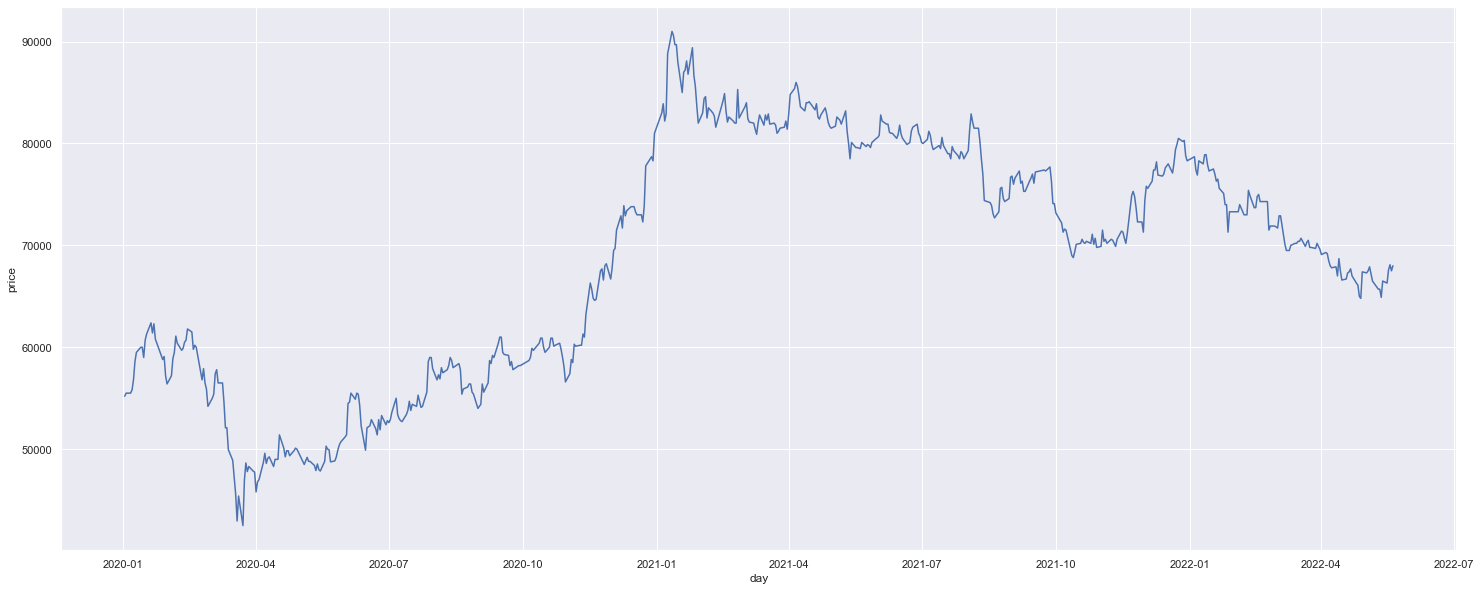

In [40]:
import seaborn as sns
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

sns.set(rc={'figure.figsize':(25,10)})
sns.lineplot(x=samsung_df.index , y=samsung_df['price'])

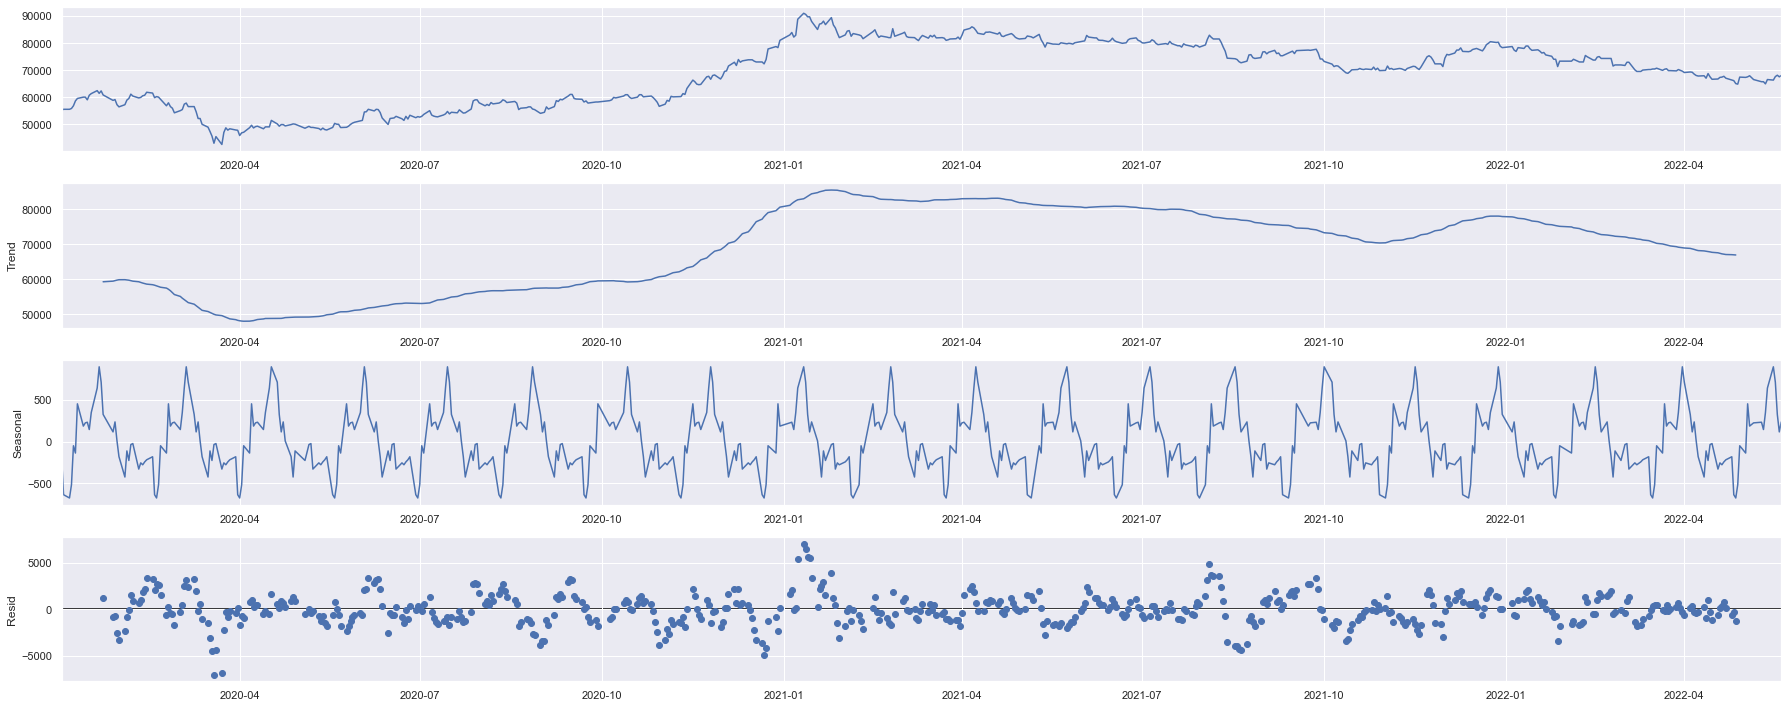

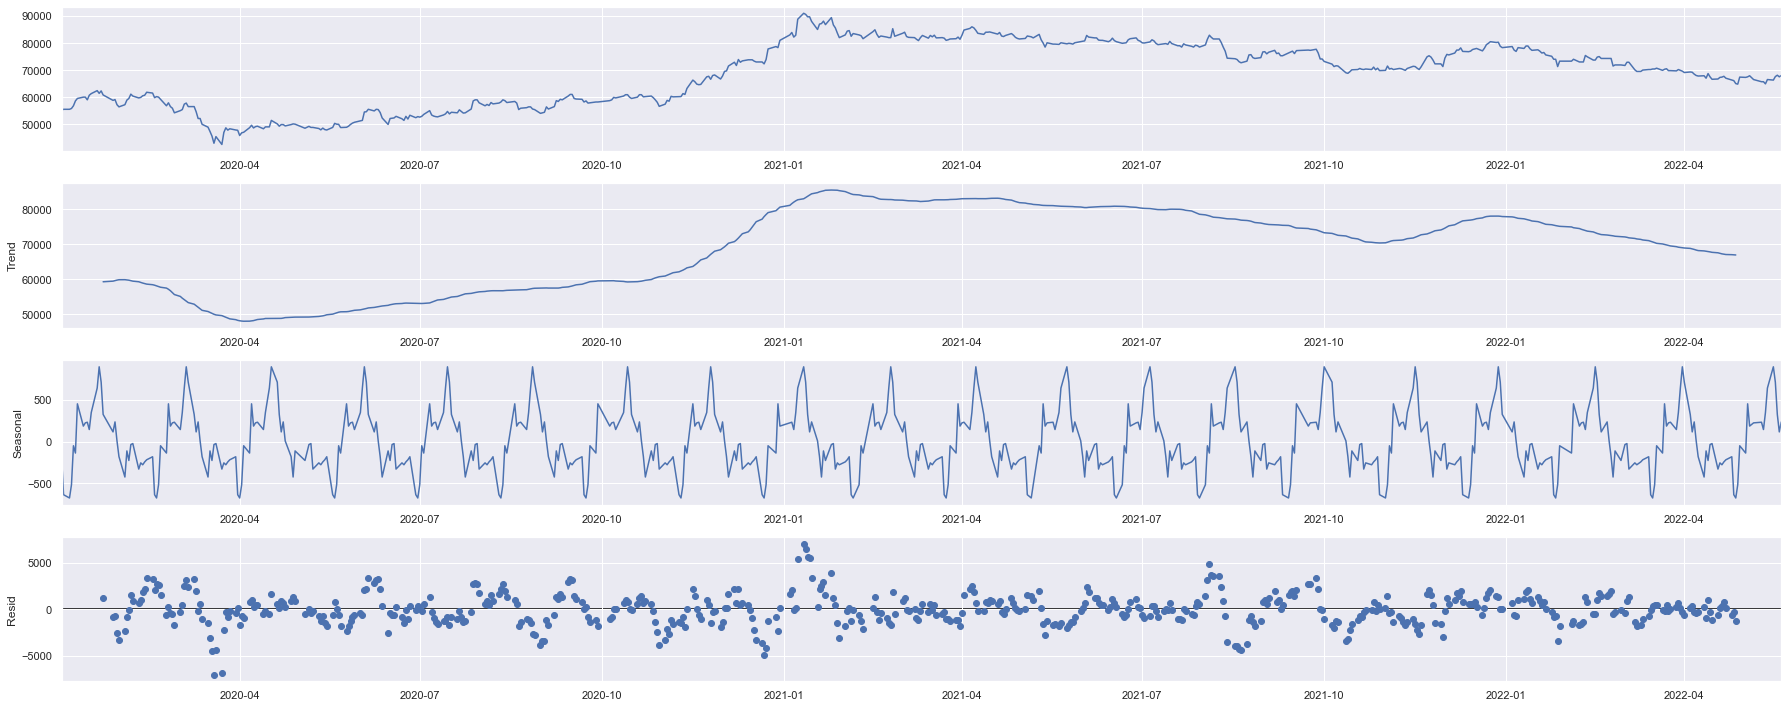

In [41]:
result = seasonal_decompose(samsung_df, model='Mulitiolicative', period = 30) # 대략 1달치 기준으로 데이터 분해 실시  
result.plot()

In [42]:
# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = sm.tsa.arima.model.ARIMA(samsung_df, order = (2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4940.591
Date:                Tue, 31 May 2022   AIC                           9891.183
Time:                        16:13:11   BIC                           9913.058
Sample:                             0   HQIC                          9899.707
                                - 588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0089    147.676   6.02e-05      1.000    -289.431     289.448
ar.L2          0.0009     16.553   5.65e-05      1.000     -32.443      32.445
ma.L1          0.0089    147.674   6.03e-05      1.0

C:\Users\PNU\.conda\envs\Pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PNU\.conda\envs\Pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PNU\.conda\envs\Pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PNU\.conda\envs\Pytorch\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stati

C:\Users\PNU\.conda\envs\Pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PNU\.conda\envs\Pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PNU\.conda\envs\Pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PNU\.conda\envs\Pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PNU\.conda\envs\Pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(by

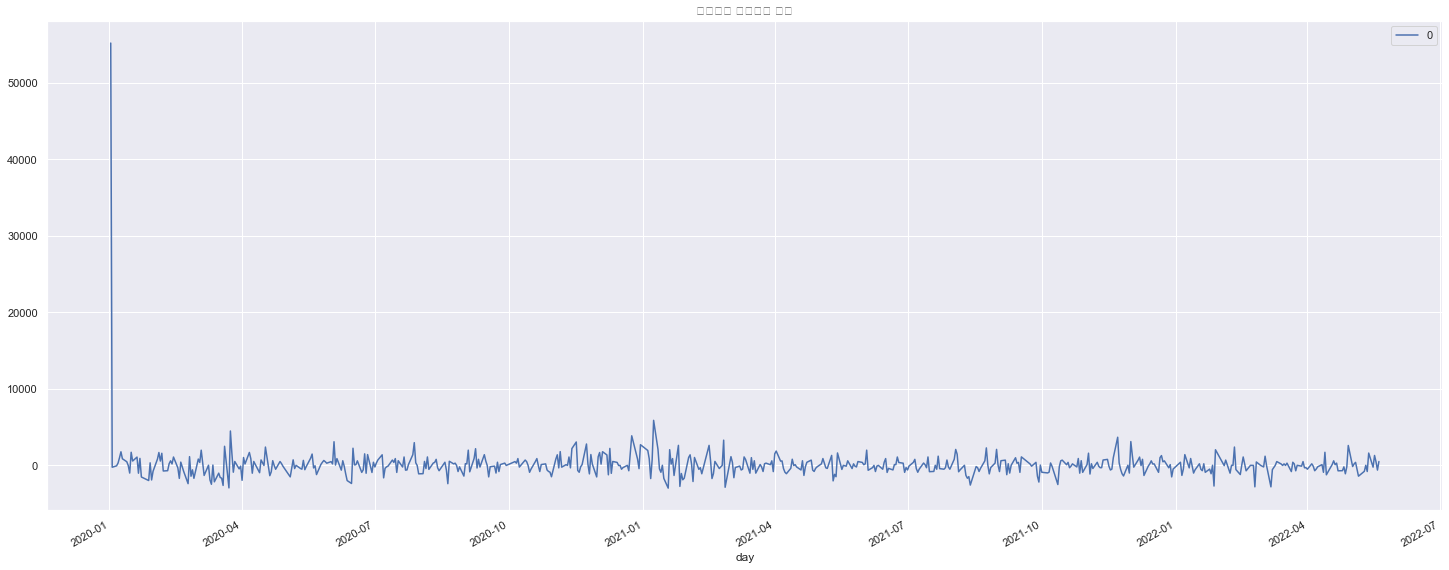

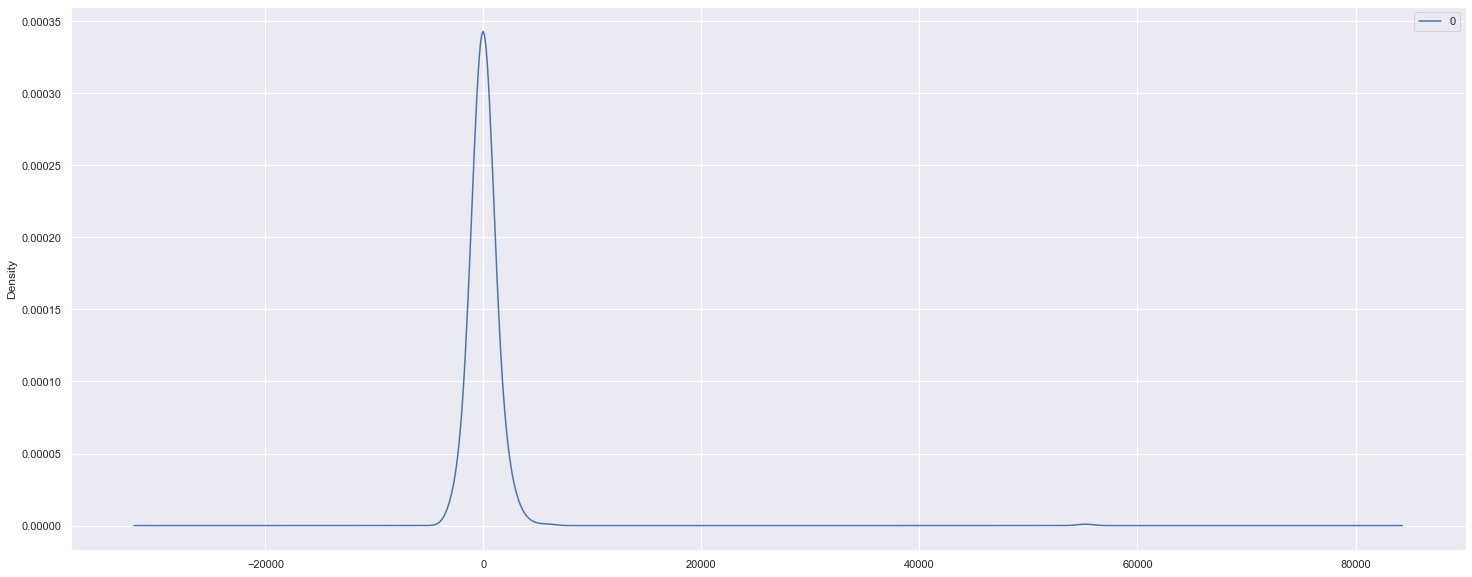

                  0
count    588.000000
mean     114.236340
std     2524.868815
min    -2969.780812
25%     -604.297771
50%        0.594816
75%      586.801857
max    55200.000000


In [43]:
#모델에 대한 정보 표시
residuals = pd.DataFrame(model_fit.resid)
#DataFrame에 모델에 대한 오차 정보를 residuals라는 변수에 저장
residuals.plot(title = "실제값과 예측값의 잔차")
#residuals 정보를 시각적으로 표현
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

### ARIMA로 예측모델 만들기


In [44]:
import numpy as np
from sklearn.metrics import mean_squared_error

X = samsung_df.values
X = np.nan_to_num(X)

size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

predicted=74851.882696, expected=73700.000000


C:\Users\PNU\.conda\envs\Pytorch\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PNU\.conda\envs\Pytorch\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=78303.789342, expected=78000.000000
predicted=74321.196361, expected=71500.000000
predicted=67794.968226, expected=67900.000000


C:\Users\PNU\.conda\envs\Pytorch\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\PNU\.conda\envs\Pytorch\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Test MSE: 883745.198


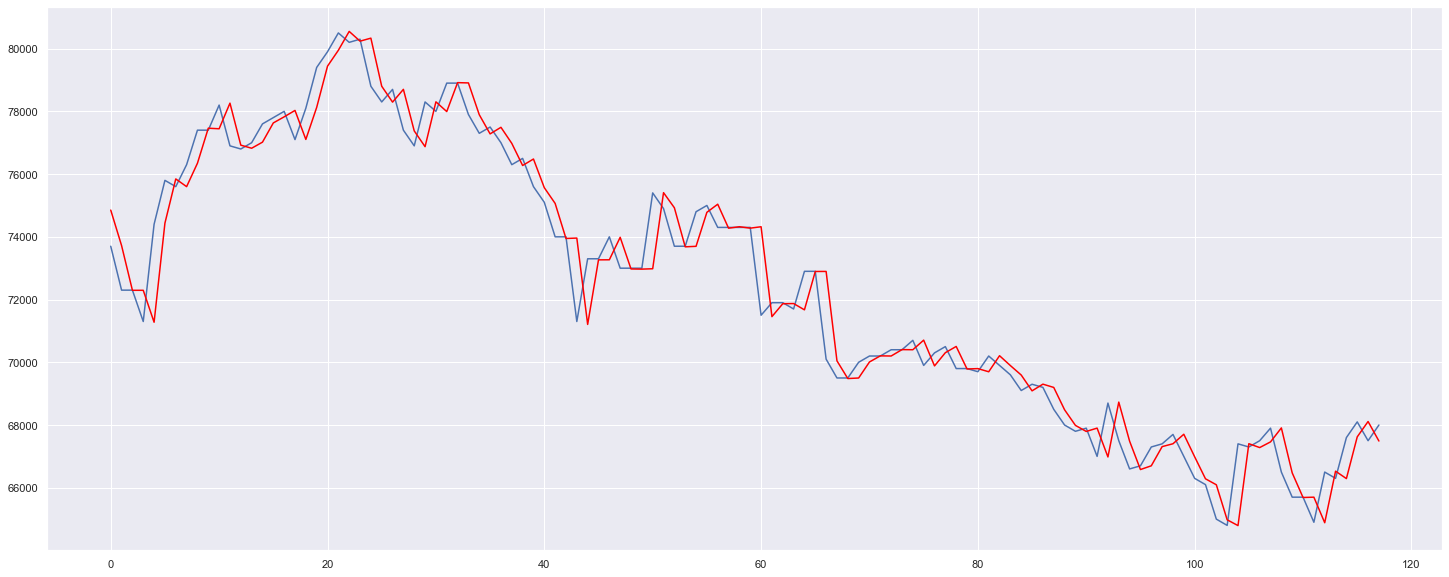

In [45]:
for t in range(len(test)):
    model = sm.tsa.arima.model.ARIMA(history, order=(2,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    if t%30==0:
        print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

파란색 실제값, 빨간색 예측값

### RNN(Recurrent Neural Network) 순환신경망
![RNN단면](../../figure/RNN.png)
시간적으로 연속성이 있는 데이터를 처리하기 위해 고안된 인공 신경망, 이전 은닉층이 현재 은닉층에 반복적으로 입력되는 순환구조  
다른 신경망과 차별화된 점은 기억(Memory)를 가지고 있다는 점, 완전순환(Fully recurrent)으로 레이어가 연속적으로 모두 연결되어 있음

![RNN단면](../../figure/inputgate.png)

### LSTM(long short-term memory, 장단기 메모리)
![RNN단면](../../figure/LSTM.png)
RNN의 경우 반복되는 뉴런속에서 기울기 소실문제가 발생해서 망각 게이트(forget gate)를 추가하여 모든 데이터를 같은 가중치를 주지 않고 시간에 따라서 이를 조절 함. 오히려 조절이 가능하기에 RNN의 경우 지나치게 과거의 일은 학습을 하지 못했지만 LSTM은 먼 사건의 학습이 유효함

https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr


### GRU(Gated recurrent units, 게이트 순환 유닛)
![RNN단면](../../figure/GRU.png)
2014년에 발명된 구조, LSTM의 망각게이트와 입력게이트를 합쳐짐 별도의 업데이트 게이트로 구성 하나의 게이트 컨트롤러가 망각게이트와 입력게이트를 모두 제어. 이전 기억이 저장될 때마다 단계별 입력은 삭제되는 것이 특징
GRU는 출력 게이트가 없어 전체 상태 벡터가 매 단계마다 출력되며, 이전 상태의 어느 부분이 출력될지 제어하는 새로운 게이트 컨트롤러가 별도로 존재

### 양방향(Bi-directional)
![RNN단면](../../figure/BIRNN.png)
RNN은 과거의 데이터를 참고해서 정답을 예측하지만 실제 문제에서는 과거가 아닌 더 미래시점의 데이터에 힌트가 있는 경우도 있음, 따라서 이전 시점의 데이터 뿐만 아니라 이후 시점의 데이터도 함께 활용하여 출력 값을 예측하고자하는것이 양방향 RNN




### RNN의 종류와 기초
![RNN단면](../../figure/rnn_image3_ver2.png)
일대다 : 입력은 하나 출력은 다수 ex)이미지를 입력해서 이미지에 대한 설명을 문장으로 출력하는 이미지 캡션  

![다대일](../../figure/다대일.jpg)
![적층된다대일](../../figure/적층된다대일.jpg)

다대일 : 입력이 다수이고 출력이 하나, 문장을 입력해서 긍정/부정을 출력하는 감성 분석기에 사용  
다대다 : 입력과 출력이 다수, 문장 다음에 단어를 예측하느 언어모델, 프레임 수준의 비디오 분류  

RNN의 활용 분야로는 자연어처리, 음성인식, 단어의 의미 판단, 센서 데이터와 같은 시계열 데이터, 손글씨

RNN셀은 RNN 계층의 for loop 구문을 갖는 구조라고 할 수 있음  
파이토치의 셀의 유형은 다음과 같음  

nn.RNNCell  : SimpleRNN계층  
nn.GRUCell  : GRU계층  
nn.LSTMCell : LSTM계층  

RNN은 은닉층 노드들이 연결되어 이전 단계 정보를 은닉층 노드에 저장할 수 있도록 구성한 신경망  

### RNN 셀 구현

In [46]:
# !pip install torchtext==0.6.0
# torchtext 라이브러리 설치
# torchtext는 자연어 처리 분야에서 사용하는 데이터로더

In [47]:
import torch
import torchtext
import torchtext.data as data
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import time

C:\Users\PNU\.conda\envs\Pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:
start = time.time()
#모두 소문자, 고정된 길이 설정(길면 조정), 첫번째 자원 값이 배치 크기가 되도록 조정
#모델의 네트워크로 입력도는 데이터는 [시퀸스 길이, 배치 크기, 은닉층의 뉴런 개수]
TEXT = data.Field(lower=True, fix_length=200, batch_first=False)

#데이터의 순서가 있는가? 각 독립적인 리뷰이지 데이터 자체는 시계열이나 순서를 가진 것이 아니기 때문에 False
LABEL = data.Field(sequential=False)

IMDB 데이터셋은 영화리뷰에 대한 데이터 5만개로 구성되어 있음

In [49]:
from torchtext import datasets
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

In [50]:
print(vars(train_data.examples[0]))

{'text': ['bromwell', 'high', 'is', 'a', 'cartoon', 'comedy.', 'it', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life,', 'such', 'as', '"teachers".', 'my', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'bromwell', "high's", 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', '"teachers".', 'the', 'scramble', 'to', 'survive', 'financially,', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', "teachers'", 'pomp,', 'the', 'pettiness', 'of', 'the', 'whole', 'situation,', 'all', 'remind', 'me', 'of', 'the', 'schools', 'i', 'knew', 'and', 'their', 'students.', 'when', 'i', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school,', 'i', 'immediately', 'recalled', '.........', 'at', '..........', 'high.', 'a', 'classic', 'line:', 'inspector:', "i'm", 'here', 'to', 'sack', 'one', 'of', '

전처리 코드를 사용하여 공백처리, 불필요한 문제제거 등 사용

In [51]:
import string

for example in train_data.examples:
    text = [x.lower() for x in vars(example)['text']] 
    text = [x.replace("<br","") for x in text] 
    text = [''.join(c for c in s if c not in string.punctuation) for s in text] 
    text = [s for s in text if s] 
    vars(example)['text'] = text
    
for example in test_data.examples:
    text = [x.lower() for x in vars(example)['text']]
    text = [x.replace("<br","") for x in text]
    text = [''.join(c for c in s if c not in string.punctuation) for s in text]
    text = [s for s in text if s]
    vars(example)['text'] = text

In [52]:
#데이터 분리
import random
train_data, valid_data = train_data.split(random_state = random.seed(0), split_ratio=0.8)

In [53]:
print(f'훈련데이터의 개수: {len(train_data)}')
print(f'검증데이터의 개수: {len(valid_data)}')
print(f'테스트데이터의 개수: {len(test_data)}')

훈련데이터의 개수: 20000
검증데이터의 개수: 5000
테스트데이터의 개수: 25000


In [54]:
#단어 집합 만들기
TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
LABEL.build_vocab(train_data)

print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")
print(f"Unique tokens in LABEL vocabulary: {len(LABEL.vocab)}")

Unique tokens in TEXT vocabulary: 10002
Unique tokens in LABEL vocabulary: 3


TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)  
훈련데이터셋, 단어 집합의 크기로 단어 집합에 포함되는 어휘 수, 특정 단어의 최소 등장 횟수 (즉 10번 이상만 등장할 경우 단어 사전에 추가), 임베딩 벡터 지정

In [55]:
print(LABEL.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x0000018E1DF14688>>, {'<unk>': 0, 'pos': 1, 'neg': 2})


In [56]:
BATCH_SIZE = 64
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

embeding_dim = 100
hidden_size = 300
#은닉층의 유닛 개수

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), batch_size = BATCH_SIZE, device = device)
#BucketIterator 데이터로더

In [57]:
class RNNCell_Encoder(nn.Module):
    def __init__(self, input_dim, hidden_size):
        super(RNNCell_Encoder, self).__init__()
        self.rnn = nn.RNNCell(input_dim, hidden_size)
        #훈련 데이터셋의 특성(feature) 개수와 은닉층의 뉴런 개수

    def forward(self, inputs):
        bz = inputs.shape[1]
        ht = torch.zeros((bz, hidden_size)).to(device)

        for word in inputs:
            ht = self.rnn(word, ht)
            #재귀적으로 발생하는 상태 값을 처리하기 위한 구문
        return ht

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.em = nn.Embedding(len(TEXT.vocab.stoi), embeding_dim)
        #단어 입베딩
        self.rnn = RNNCell_Encoder(embeding_dim, hidden_size)
        self.fc1 = nn.Linear(hidden_size, 256)
        self.fc2 = nn.Linear(256, 3)

    def forward(self, x):
        x = self.em(x)
        x = self.rnn(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

![RNN단면](../../figure/은닉층.jpg)
ht = self.rnn(word, ht)  
그림에서의 h_t 의미 word는 현재의 입력 벡터로 다음 그림의 x_t, ht는 이전 상태의 h_t-1


In [58]:
#옵티마이저와 손실함수 정의
model = Net()
model.to(device)

loss_fn = nn.CrossEntropyLoss()
#다중 분류를 위해서 크로스엔트로피 사용
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [59]:
def training(epoch, model, trainloader, validloader):
    correct = 0
    total = 0
    running_loss = 0

    model.train()
    for b in trainloader:
        x, y = b.text, b.label
        x, y = x.to(device), y.to(device)
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss += loss.item()
    epoch_loss = running_loss / len(trainloader.dataset)
    epoch_acc = correct / total

    valid_correct = 0
    valid_total = 0
    valid_running_loss = 0

    model.eval()
    with torch.no_grad():
        for b in validloader:
            x, y = b.text, b.label
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            valid_correct += (y_pred == y).sum().item()
            valid_total += y.size(0)
            valid_running_loss += loss.item()

    epoch_valid_loss = valid_running_loss / len(validloader.dataset)
    epoch_valid_acc = valid_correct / valid_total

    print('epoch: ', epoch+1,
          'loss： ', round(epoch_loss, 3),
          'accuracy:', round(epoch_acc, 3),
          'valid_loss： ', round(epoch_valid_loss, 3),
          'valid_accuracy:', round(epoch_valid_acc, 3)
          )
    return epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc

In [60]:
epochs = 5
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []
for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc = training(epoch,model,train_iterator,valid_iterator)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    valid_loss.append(epoch_valid_loss)
    valid_acc.append(epoch_valid_acc)
end = time.time()
print(end-start)

epoch:  1 loss：  0.011 accuracy: 0.496 valid_loss：  0.011 valid_accuracy: 0.51
epoch:  2 loss：  0.011 accuracy: 0.501 valid_loss：  0.011 valid_accuracy: 0.496
epoch:  3 loss：  0.011 accuracy: 0.513 valid_loss：  0.011 valid_accuracy: 0.494
epoch:  4 loss：  0.011 accuracy: 0.517 valid_loss：  0.011 valid_accuracy: 0.496
epoch:  5 loss：  0.011 accuracy: 0.527 valid_loss：  0.011 valid_accuracy: 0.51
989.1992218494415


In [61]:
#모델 예측함수 정의
def evaluate(epoch, model, testloader):    
    test_correct = 0
    test_total = 0
    test_running_loss = 0
    
    model.eval()
    with torch.no_grad():
        for b in testloader:
            x, y = b.text, b.label
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
            test_running_loss += loss.item()

    epoch_test_loss = test_running_loss / len(testloader.dataset)
    epoch_test_acc = test_correct / test_total

    print('epoch: ', epoch,
          'test_loss： ', round(epoch_test_loss, 3),
          'test_accuracy:', round(epoch_test_acc, 3)
          )
    return epoch_test_loss, epoch_test_acc

In [62]:
epochs = 5
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_test_loss, epoch_test_acc = evaluate(epoch, model, test_iterator)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

end = time.time()
print(end-start)

epoch:  0 test_loss：  0.011 test_accuracy: 0.501
epoch:  1 test_loss：  0.011 test_accuracy: 0.501
epoch:  2 test_loss：  0.011 test_accuracy: 0.501
epoch:  3 test_loss：  0.011 test_accuracy: 0.501
epoch:  4 test_loss：  0.011 test_accuracy: 0.501
1072.5971431732178


![BPTT](../../figure/BPTT.jpg)


RNN에서 역전파는 BPTT(BackPropagation Through Time)를 이용하여 모든 단계마다 처음부터 끝까지 역전파하게됨, 오차는 각 단계(t)마다 오차를 측정하고 이전 단계로 전달되는데, 이것을 BPTT라고 함

이때 BPTT는 오차가 멀리 전파될 때(왼쪽으로 전파) 계산량이 많아지고 전파되는 양이 점차 적어지는 문제점(기울기 소멸 문제(vanishing gradient problem))이 발생

다시 이를 다른 그림으로 보면

![RNN단면](../../figure/바닐라RNN.png)

바닐라 RNN은 출력 결과가 이전의 계산 결과에 의존하는데, 이는 비교적 짧은 시퀀스(sequence)에 대해서만 효과를 보이는 단점이 있는 것을 확인. 바닐라 RNN의 시점(time step)이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상이 발생

이를 장기 의존성 문제(the problem of Long-Term Dependencies)라고 함

https://wikidocs.net/22888

경험적으로 데이터 양이 적을 때는 매개 변수의 양이 적은 GRU가 조금 더 낫고, 데이터 양이 더 많으면 LSTM이 더 낫다고도 합니다. GRU보다 LSTM에 대한 연구나 사용량이 더 많은데, 이는 LSTM이 더 먼저 나온 구조